In [15]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key

In [19]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [20]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
coordinates = zip(lats, lngs)
coordinates

In [21]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [22]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [23]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | dawei
Processing Record 4 of Set 1 | pevek
Processing Record 5 of Set 1 | solnechnyy
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | lagoa
Processing Record 8 of Set 1 | cam ranh
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | mwadui
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | cartagena
Processing Record 15 of Set 1 | kawalu
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | aktau
Processing Record 18 of Set 1 | znamenskoye
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | vilyuysk
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | busselton
Processing R

Processing Record 41 of Set 4 | dunedin
Processing Record 42 of Set 4 | darhan
Processing Record 43 of Set 4 | jutai
Processing Record 44 of Set 4 | galiwinku
City not found. Skipping...
Processing Record 45 of Set 4 | kavieng
Processing Record 46 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 4 | mar del plata
Processing Record 48 of Set 4 | coahuayana
Processing Record 49 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 50 of Set 4 | concarneau
Processing Record 1 of Set 5 | opuwo
Processing Record 2 of Set 5 | dranic
City not found. Skipping...
Processing Record 3 of Set 5 | beira
Processing Record 4 of Set 5 | saleaula
City not found. Skipping...
Processing Record 5 of Set 5 | puerto el triunfo
Processing Record 6 of Set 5 | port hedland
Processing Record 7 of Set 5 | ishinomaki
Processing Record 8 of Set 5 | cidreira
Processing Record 9 of Set 5 | nassjo
Processing Record 10 of Set 5 | half moon bay
Processing Record 11 of

Processing Record 25 of Set 8 | vardo
Processing Record 26 of Set 8 | khonuu
City not found. Skipping...
Processing Record 27 of Set 8 | hovd
Processing Record 28 of Set 8 | staritsa
Processing Record 29 of Set 8 | ossora
Processing Record 30 of Set 8 | lompoc
Processing Record 31 of Set 8 | kibala
Processing Record 32 of Set 8 | oudtshoorn
Processing Record 33 of Set 8 | xiongzhou
Processing Record 34 of Set 8 | deputatskiy
Processing Record 35 of Set 8 | colmenar viejo
Processing Record 36 of Set 8 | severo-kurilsk
Processing Record 37 of Set 8 | esperance
Processing Record 38 of Set 8 | barbar
City not found. Skipping...
Processing Record 39 of Set 8 | a coruna
Processing Record 40 of Set 8 | kudahuvadhoo
Processing Record 41 of Set 8 | pisco
Processing Record 42 of Set 8 | pangai
Processing Record 43 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 44 of Set 8 | tiznit
Processing Record 45 of Set 8 | nyandoma
Processing Record 46 of Set 8 | sabang
Processing Record

Processing Record 9 of Set 12 | capitao poco
Processing Record 10 of Set 12 | moralillo
Processing Record 11 of Set 12 | matagami
Processing Record 12 of Set 12 | suntar
Processing Record 13 of Set 12 | kloulklubed
Processing Record 14 of Set 12 | champerico
Processing Record 15 of Set 12 | ijaki
City not found. Skipping...
Processing Record 16 of Set 12 | marawi
Processing Record 17 of Set 12 | porto belo
Processing Record 18 of Set 12 | san roque
Processing Record 19 of Set 12 | quatre cocos
Processing Record 20 of Set 12 | brae
Processing Record 21 of Set 12 | kalianget
Processing Record 22 of Set 12 | fukue
Processing Record 23 of Set 12 | san policarpo
Processing Record 24 of Set 12 | praia da vitoria
Processing Record 25 of Set 12 | mount isa
Processing Record 26 of Set 12 | ponta do sol
Processing Record 27 of Set 12 | formosa
Processing Record 28 of Set 12 | lianzhou
Processing Record 29 of Set 12 | west wendover
Processing Record 30 of Set 12 | aasiaat
Processing Record 31 of 

In [25]:
len(city_data)


546

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,50.81,74,13,16.28,NZ,2022-06-07 12:47:30
1,San Patricio,28.0170,-97.5169,82.29,74,2,15.30,US,2022-06-07 12:47:30
2,Dawei,14.0833,98.2000,75.88,92,100,5.99,MM,2022-06-07 12:47:30
3,Pevek,69.7008,170.3133,30.51,84,34,5.95,RU,2022-06-07 12:47:31
4,Solnechnyy,50.7214,136.6319,57.09,74,100,3.40,RU,2022-06-07 12:47:31
5,Vaini,-21.2000,-175.2000,71.76,78,20,5.75,TO,2022-06-07 12:47:31
6,Lagoa,39.0500,-27.9833,64.89,91,100,26.82,PT,2022-06-07 12:47:32
7,Cam Ranh,11.9214,109.1591,82.36,74,20,2.30,VN,2022-06-07 12:47:32
8,Qaanaaq,77.4840,-69.3632,29.61,91,94,1.10,GL,2022-06-07 12:44:08
9,Mwadui,-3.5500,33.6000,83.30,31,100,4.45,TZ,2022-06-07 12:47:33


In [29]:
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]

In [30]:
city_data_df.head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-06-07 12:47:30,-46.6000,168.3333,50.81,74,13,16.28
1,San Patricio,US,2022-06-07 12:47:30,28.0170,-97.5169,82.29,74,2,15.30
2,Dawei,MM,2022-06-07 12:47:30,14.0833,98.2000,75.88,92,100,5.99
3,Pevek,RU,2022-06-07 12:47:31,69.7008,170.3133,30.51,84,34,5.95
4,Solnechnyy,RU,2022-06-07 12:47:31,50.7214,136.6319,57.09,74,100,3.40


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1654608549.714868

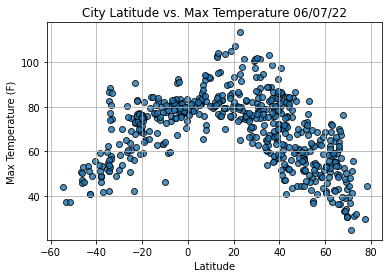

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

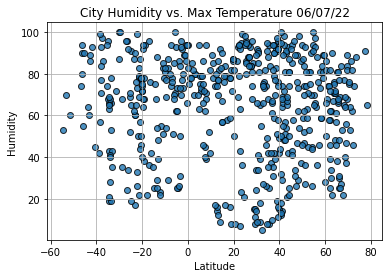

In [39]:
# Build the scatter plot for humidity vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Humidity vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

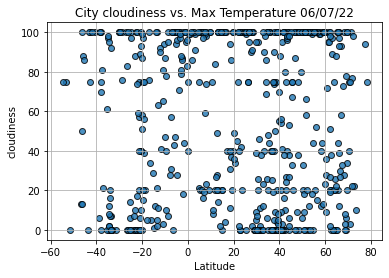

In [40]:
# Build the scatter plot for humidity vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City cloudiness vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

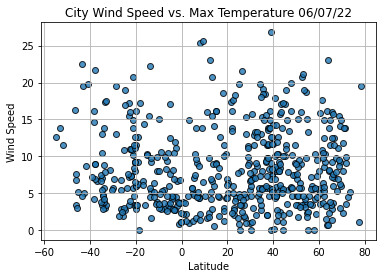

In [41]:
# Build the scatter plot for lat vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Wind Speed vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [42]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [44]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

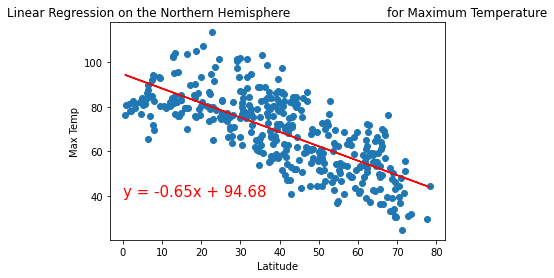

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,40))

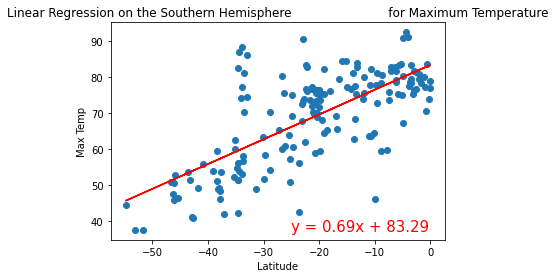

In [54]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-25,37))

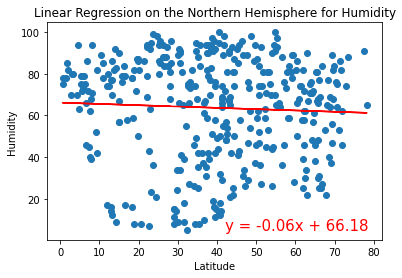

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Humidity', 'Humidity',(42,5))

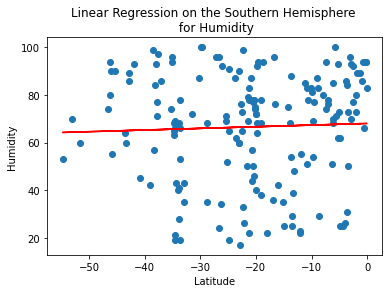

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Humidity', 'Humidity',(20,-20))

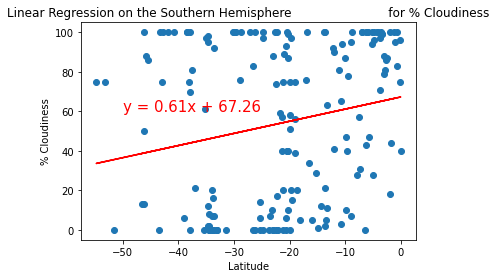

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

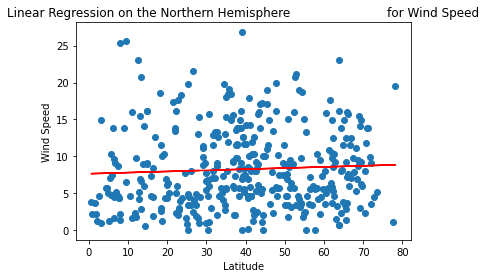

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

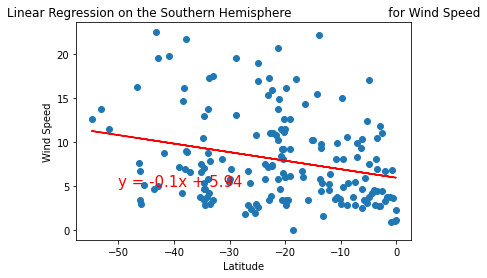

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,5))